In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()


'/workspaces/IT326-PROJECT'

In [19]:
diabetes = pd.read_csv('/workspaces/IT326-PROJECT/Dataset/Healthcare Diabetes.csv')
df= pd.DataFrame(diabetes)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [21]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [19]:
overall_variance=df.var()
print("Overall Variance:\n",overall_variance)

Overall Variance:
 Id                          638716.000000
Pregnancies                     11.047653
Glucose                       1026.337861
BloodPressure                  369.848213
SkinThickness                  257.910614
Insulin                      12611.724151
BMI                             65.223831
DiabetesPedigreeFunction         0.106060
Age                            138.703146
Outcome                          0.225724
dtype: float64


In [20]:
print(df.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

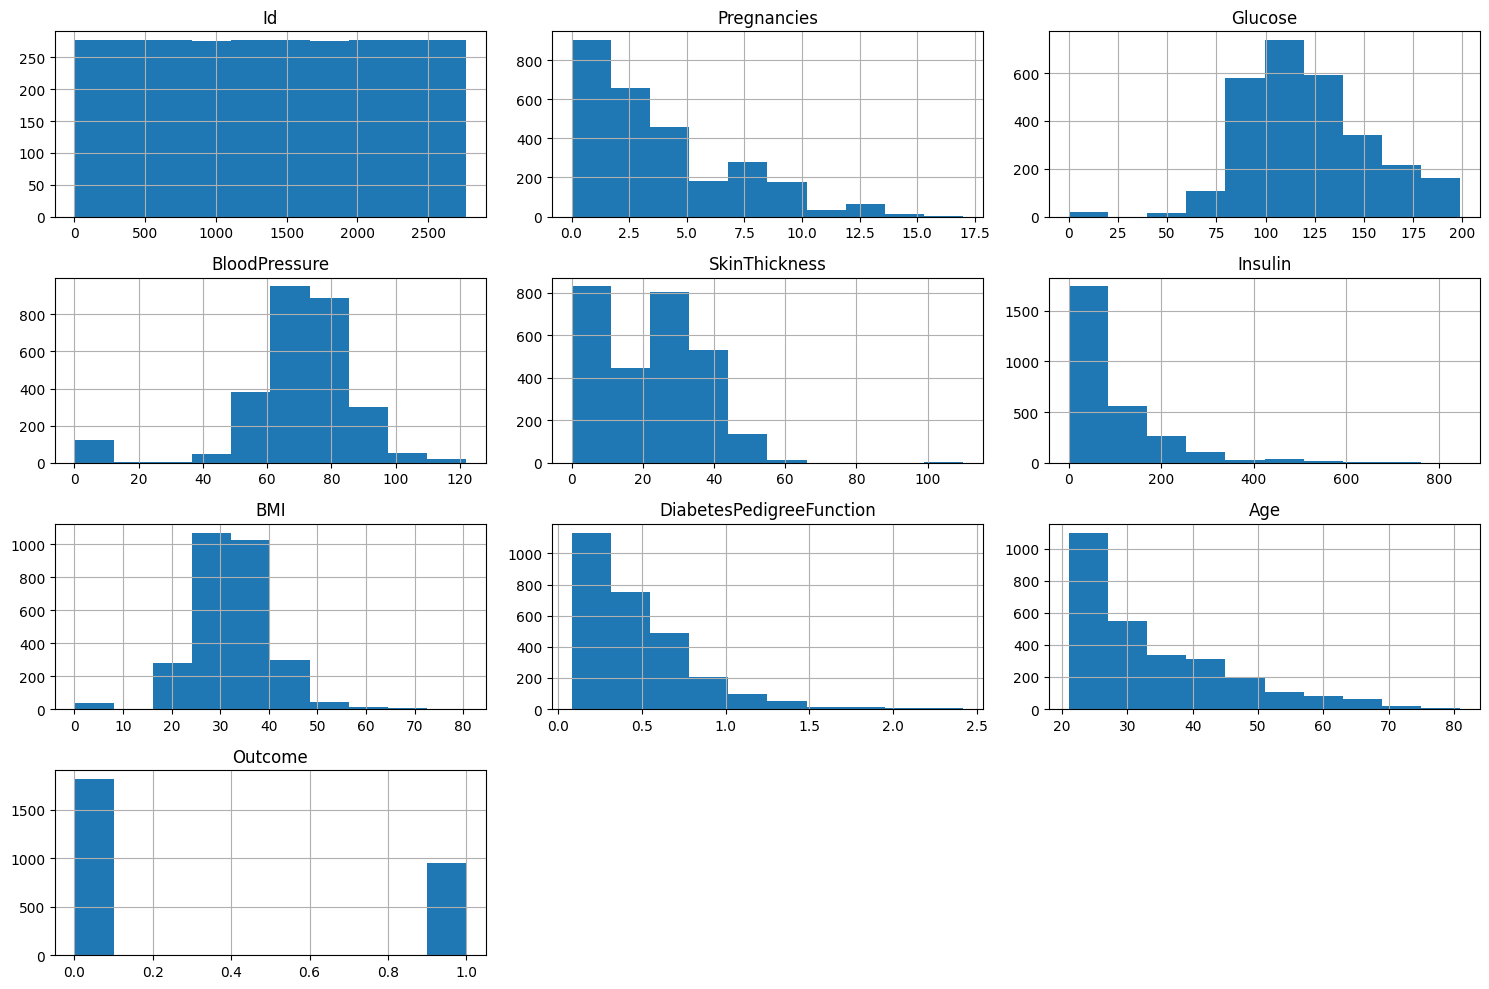

In [22]:
df.hist(bins=10 , figsize=(15,10))
plt.tight_layout()
plt.show

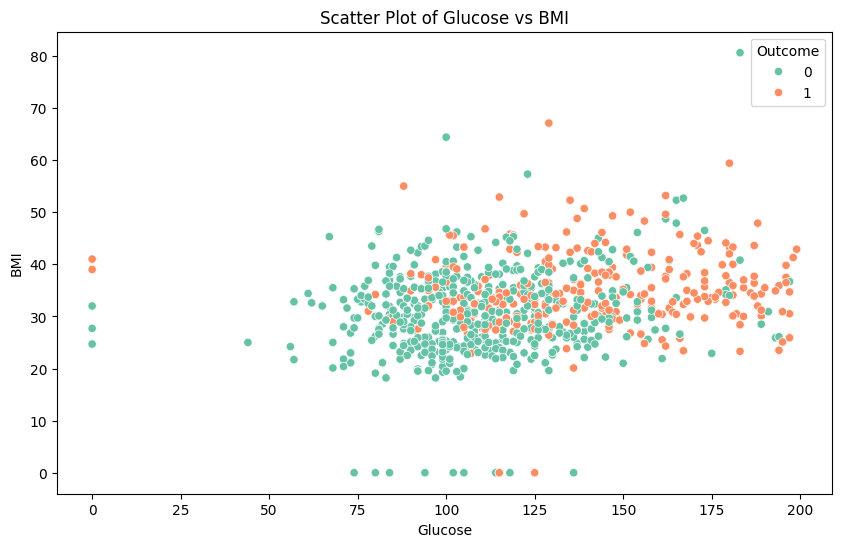

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome' ,palette='Set2' )
plt.title('Scatter Plot of Glucose vs BMI')
plt.show()

/tmp/ipykernel_7584/726396979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Glucose', data=df, estimator='mean', palette='viridis')


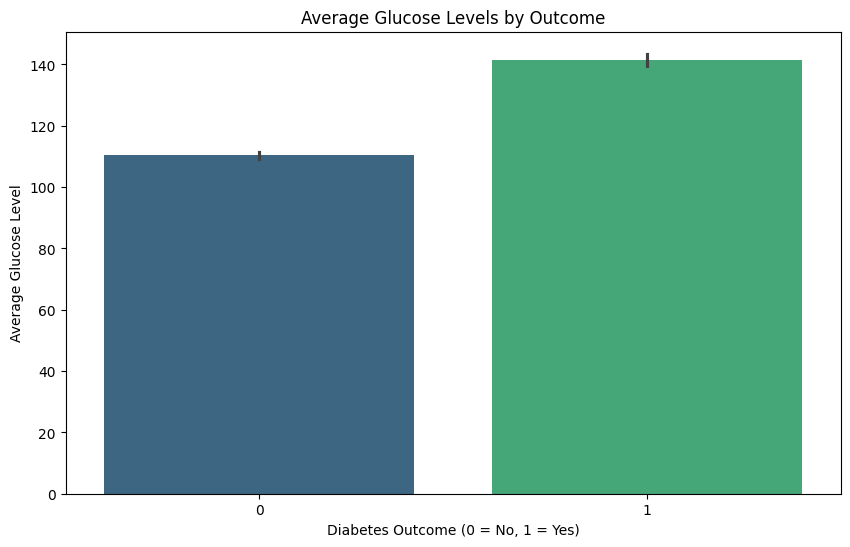

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outcome', y='Glucose', data=df, estimator='mean', palette='viridis')

plt.title('Average Glucose Levels by Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.show()

In [29]:
#feature selection by using filter method

from sklearn.feature_selection import SelectKBest, f_classif 

#choosing all columns except the class label column
x = df[df.columns[:-1]] 

#y taken the class label
y = df['Outcome']

#select the 3 best columns
selector = SelectKBest(score_func=f_classif, k=3)
new_x = selector.fit_transform(x,y)


selected_feature = x.columns[selector.get_support()]
print("Selected Features:" , selected_feature)



Selected Features: Index(['Glucose', 'BMI', 'Age'], dtype='object')


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif 

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
new_x = rfe.fit_transform(x,y)


selected_features = [i for i, mask in enumerate(rfe.support_)if mask]
print("Selected Features:" ,selected_features )




Selected Features: [1, 6, 7]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re